Author : Victor Jayaseelan 
Date   : Jan 9

In [ ]:
#Categories
0. T-shirt/top
1.Trousers
2.Pullover
3.Dress
4.Coat
5.Sandal
6.Shirt
7.Sneaker
8.Bag
9.Ankle boot

In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [2]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
y_label=y_test

In [5]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


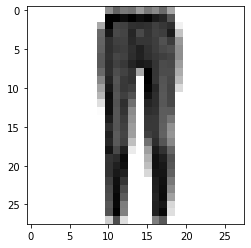

In [6]:
plt.imshow(x_train[9456].reshape([28,28]),cmap=plt.get_cmap('gray_r'))



In [7]:
from tensorflow.keras import backend as tfk

if tfk.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
    




In [8]:
x_test = x_test.astype('float32') / 255  # Normalize the data dimension

In [9]:
x_train = x_train.astype('float32') / 255

In [10]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)  # One hot encoding


In [11]:
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
model_test = Sequential()
# 1st layer 32 kernels 3x3 size
model_test.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding='same', #zero padding
                 activation='relu',
                 input_shape=input_shape))
# 2nd Conv layer 64 kernels 3x3 size
model_test.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
# Maxpooling layer 2x2
model_test.add(MaxPooling2D(pool_size=(2, 2)))


# Flattening layer
model_test.add(Flatten())

model_test.add(Dense(128, activation='relu'))

# Softmax categorization layer
model_test.add(Dense(10, activation='softmax'))



In [19]:
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,625,866
Trainable params: 1,625,866
Non-trainable params: 0
____________________________________________

In [20]:
model_test.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model_test.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 - 84s - loss: 0.3517 - accuracy: 0.8753 - val_loss: 0.2716 - val_accuracy: 0.9006
Epoch 2/10
1875/1875 - 96s - loss: 0.2143 - accuracy: 0.9210 - val_loss: 0.2292 - val_accuracy: 0.9179
Epoch 3/10
1875/1875 - 94s - loss: 0.1611 - accuracy: 0.9399 - val_loss: 0.2678 - val_accuracy: 0.9062
Epoch 4/10
1875/1875 - 96s - loss: 0.1191 - accuracy: 0.9562 - val_loss: 0.2375 - val_accuracy: 0.9209
Epoch 5/10
1875/1875 - 101s - loss: 0.0841 - accuracy: 0.9689 - val_loss: 0.2515 - val_accuracy: 0.9280
Epoch 6/10
1875/1875 - 96s - loss: 0.0614 - accuracy: 0.9774 - val_loss: 0.2898 - val_accuracy: 0.9231
Epoch 7/10
1875/1875 - 93s - loss: 0.0429 - accuracy: 0.9850 - val_loss: 0.3053 - val_accuracy: 0.9278
Epoch 8/10
1875/1875 - 93s - loss: 0.0341 - accuracy: 0.9878 - val_loss: 0.3598 - val_accuracy: 0.9287
Epoch 9/10
1875/1875 - 93s - loss: 0.0272 - accuracy: 0.9901 - val_loss: 0.4206 - val_accuracy: 0.9263
Epoch 10/10
1875/1875 - 92s - loss: 0.0227 - accuracy: 0.9918 - val_loss

In [ ]:
#Trying to add dropout layers to avoid overfitting.
#Added two dropout layers, one after Maxpooling layer, another one after Fully connected layer just before the output layer


In [14]:

model = Sequential()
# 1st layer 32 kernels 3x3 size
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding='same', #zero padding
                 activation='relu',
                 input_shape=input_shape))
# 2nd Conv layer 64 kernels 3x3 size
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
# Maxpooling layer 2x2"
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout to layers to avoid overfitting
model.add(Dropout(0.3))

# Flattening layer
model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dropout(0.5))

# Softmax categorization layer
model.add(Dense(10, activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 - 87s - loss: 0.4579 - accuracy: 0.8388 - val_loss: 0.3025 - val_accuracy: 0.8873
Epoch 2/10
1875/1875 - 93s - loss: 0.3044 - accuracy: 0.8911 - val_loss: 0.2642 - val_accuracy: 0.9013
Epoch 3/10
1875/1875 - 92s - loss: 0.2572 - accuracy: 0.9078 - val_loss: 0.2308 - val_accuracy: 0.9162
Epoch 4/10
1875/1875 - 92s - loss: 0.2270 - accuracy: 0.9163 - val_loss: 0.2359 - val_accuracy: 0.9154
Epoch 5/10
1875/1875 - 95s - loss: 0.2059 - accuracy: 0.9245 - val_loss: 0.2241 - val_accuracy: 0.9204
Epoch 6/10
1875/1875 - 97s - loss: 0.1869 - accuracy: 0.9311 - val_loss: 0.2159 - val_accuracy: 0.9217
Epoch 7/10
1875/1875 - 94s - loss: 0.1738 - accuracy: 0.9362 - val_loss: 0.2279 - val_accuracy: 0.9255
Epoch 8/10
1875/1875 - 94s - loss: 0.1610 - accuracy: 0.9401 - val_loss: 0.2222 - val_accuracy: 0.9273
Epoch 9/10
1875/1875 - 94s - loss: 0.1501 - accuracy: 0.9444 - val_loss: 0.2381 - val_accuracy: 0.9253
Epoch 10/10
1875/1875 - 96s - loss: 0.1426 - accuracy: 0.9469 - val_loss:

In [22]:
val=model.predict(x_test[400].reshape([1,28,28,1]))

In [23]:
val

array([[9.9966431e-01, 5.4182150e-14, 9.1504315e-10, 7.7088789e-09,
        1.3266211e-14, 1.0512301e-15, 3.3571065e-04, 5.0761656e-25,
        3.8529968e-13, 9.4867963e-22]], dtype=float32)

In [24]:
val.argmax(axis=1)

array([0])

[[4.0034499e-04 5.7208971e-10 9.3158867e-08 1.4747390e-05 4.7324443e-06
  6.8638462e-10 9.9958009e-01 1.2664975e-15 4.0972100e-08 1.1625428e-11]
 [1.1018249e-11 3.1008096e-17 5.1592018e-14 3.7091437e-14 7.1706340e-14
  1.0000000e+00 5.2110618e-11 2.9482303e-08 3.6623356e-12 1.6974333e-08]
 [7.4634898e-01 3.5794653e-08 2.0327287e-05 9.3683630e-06 2.8065594e-07
  1.3825070e-08 2.5362086e-01 1.4727332e-11 5.8019285e-08 5.7385784e-12]
 [2.8278144e-09 5.9431252e-13 1.4501015e-11 5.3691453e-13 1.7073387e-13
  1.0531670e-07 6.3322519e-10 9.9999988e-01 3.2248351e-10 3.4709696e-08]
 [1.2740198e-06 2.0590216e-12 5.9943485e-01 2.9473022e-09 4.0055975e-01
  2.5043357e-13 4.1605485e-06 6.1676334e-19 2.0158188e-11 7.5752258e-16]]
Labels Predicted: [6 5 0 7 2]


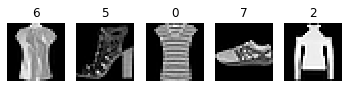

In [25]:

sample_size = 5
indices = random.sample(range(x_test.shape[0] - 1), sample_size)
samp_images = x_test[indices]
samp_labels = y_label[indices]

for i in range(sample_size):
    plt.subplot(1,sample_size,i+1)
    plt.imshow(samp_images[i].reshape(28, 28), cmap='gray')
    plt.title(samp_labels[i])
    plt.axis('off')

prediction = model.predict(samp_images.reshape(sample_size, 28, 28, 1))
print(prediction)
prediction = np.array(prediction)
predicted_label = prediction.argmax(axis=1)
print('Labels Predicted: {}'.format(predicted_label))
